In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import zipfile

In [5]:
COLORS   = ['#0072B2', '#f67824']  # Colors for basic/deduplicated charts
PALETTES = ['Blues', 'Oranges']    # Color palettes for basic/deduplicated heatmaps
PERIOD   = 50                      # Length of time period to which publication dates are merged

In [6]:
# Unzip csv if not done before
if not os.path.exists('mentions.csv'):
    with zipfile.ZipFile('mentions.csv.zip', 'r') as zip_ref:
        zip_ref.extractall()  

# Build dataframes

In [7]:
# Load poet mentions from csv file
mentions = pd.read_csv('mentions.csv', names=['work_id', 'page_id', 'author', 'born', 'gender', 'country', 'qid'])
# Load PPA metadata on particular books from CSV file
ppa_metadata = pd.read_csv('ppa_corpus/ppa_corpus_2025-02-03_1308/ppa_metadata.csv')
# Add year of publication to mentions
mentions = mentions.merge(ppa_metadata[['work_id', 'pub_year']], on='work_id', how='left')
# Add century (when author born) column
mentions['century'] = (mentions['born'] // 100 )*100
# Add publication period column
mentions['pub_period'] = (mentions['pub_year'] // PERIOD )*PERIOD
# Simplify countries
with open('simplified_countries.json') as f:
    mentions["country"] = mentions["country"].replace(json.load(f))
mentions.head(15)

,work_id,page_id,author,born,gender,country,qid,pub_year,century,pub_period
0,A01224,A01224.1,Torquato Tasso,1544,male,NaN,Q168962,1588.0,1500,1550.0
1,A01224,A01224.1,Virgil,-70,male,Ancient Rome,Q1398,1588.0,-100,1550.0
2,A01224,A01224.1,Homer,-900,male,Ancient Greece,Q6691,1588.0,-900,1550.0
3,A01224,A01224.1,Abraham Fraunce,1558,male,UK/Ireland,Q3364589,1588.0,1500,1550.0
4,A01224,A01224.10,Philip Sidney,1554,male,UK/Ireland,Q315509,1588.0,1500,1550.0
5,A01224,A01224.10,Euripides,-480,male,Ancient Greece,Q48305,1588.0,-500,1550.0
6,A01224,A01224.100,Virgil,-70,male,Ancient Rome,Q1398,1588.0,-100,1550.0
7,A01224,A01224.101,Philip Sidney,1554,male,UK/Ireland,Q315509,1588.0,1500,1550.0
8,A01224,A01224.104,Homer,-900,male,Ancient Greece,Q6691,1588.0,-900,1550.0
9,A01224,A01224.104,Virgil,-70,male,Ancient Rome,Q1398,1588.0,-100,1550.0


In [8]:
# Create deduplicated dataframe (just one poet mention per book counts)
mentions_deduplicated = mentions.drop_duplicates(subset=['author', 'work_id'])
mentions_deduplicated.head(15)

,work_id,page_id,author,born,gender,country,qid,pub_year,century,pub_period
0,A01224,A01224.1,Torquato Tasso,1544,male,NaN,Q168962,1588.0,1500,1550.0
1,A01224,A01224.1,Virgil,-70,male,Ancient Rome,Q1398,1588.0,-100,1550.0
2,A01224,A01224.1,Homer,-900,male,Ancient Greece,Q6691,1588.0,-900,1550.0
3,A01224,A01224.1,Abraham Fraunce,1558,male,UK/Ireland,Q3364589,1588.0,1500,1550.0
4,A01224,A01224.10,Philip Sidney,1554,male,UK/Ireland,Q315509,1588.0,1500,1550.0
5,A01224,A01224.10,Euripides,-480,male,Ancient Greece,Q48305,1588.0,-500,1550.0
20,A01224,A01224.126,Bernardo Dovizi,1470,male,NaN,Q823002,1588.0,1400,1550.0
27,A01224,A01224.134,Augustine of Hippo,354,male,Ancient Rome,Q8018,1588.0,300,1550.0
53,A01224,A01224.16,Tacitus,56,male,Ancient Rome,Q2161,1588.0,0,1550.0
68,A01224,A01224.36,Rémy Belleau,1528,male,France,Q561709,1588.0,1500,1550.0


# Overall stats

In [9]:
print(f"Number of mentions: {len(mentions)}")
print(f"Number of unique authors mentioned: {mentions['author'].nunique()}")
print(f"Number of books: {mentions['work_id'].nunique()}")
print("------- # of books in each period ------- ")
print(mentions.groupby('pub_period')['work_id'].nunique())
print('------- # of mentions in each period ------- ')
print(mentions['pub_period'].value_counts().sort_index())

Number of mentions: 1206260
Number of unique authors mentioned: 1384
Number of books: 6883
------- # of books in each period ------- 
pub_period
1500.0       1
1550.0      17
1600.0      10
1650.0      41
1700.0     331
1750.0    1385
1800.0     943
1850.0    2166
1900.0    1989
Name: work_id, dtype: int64
------- # of mentions in each period ------- 
pub_period
1500.0        11
1550.0       840
1600.0       749
1650.0      7323
1700.0     47833
1750.0    172016
1800.0    156288
1850.0    447947
1900.0    373253
Name: count, dtype: int64


### N most mentioned authors

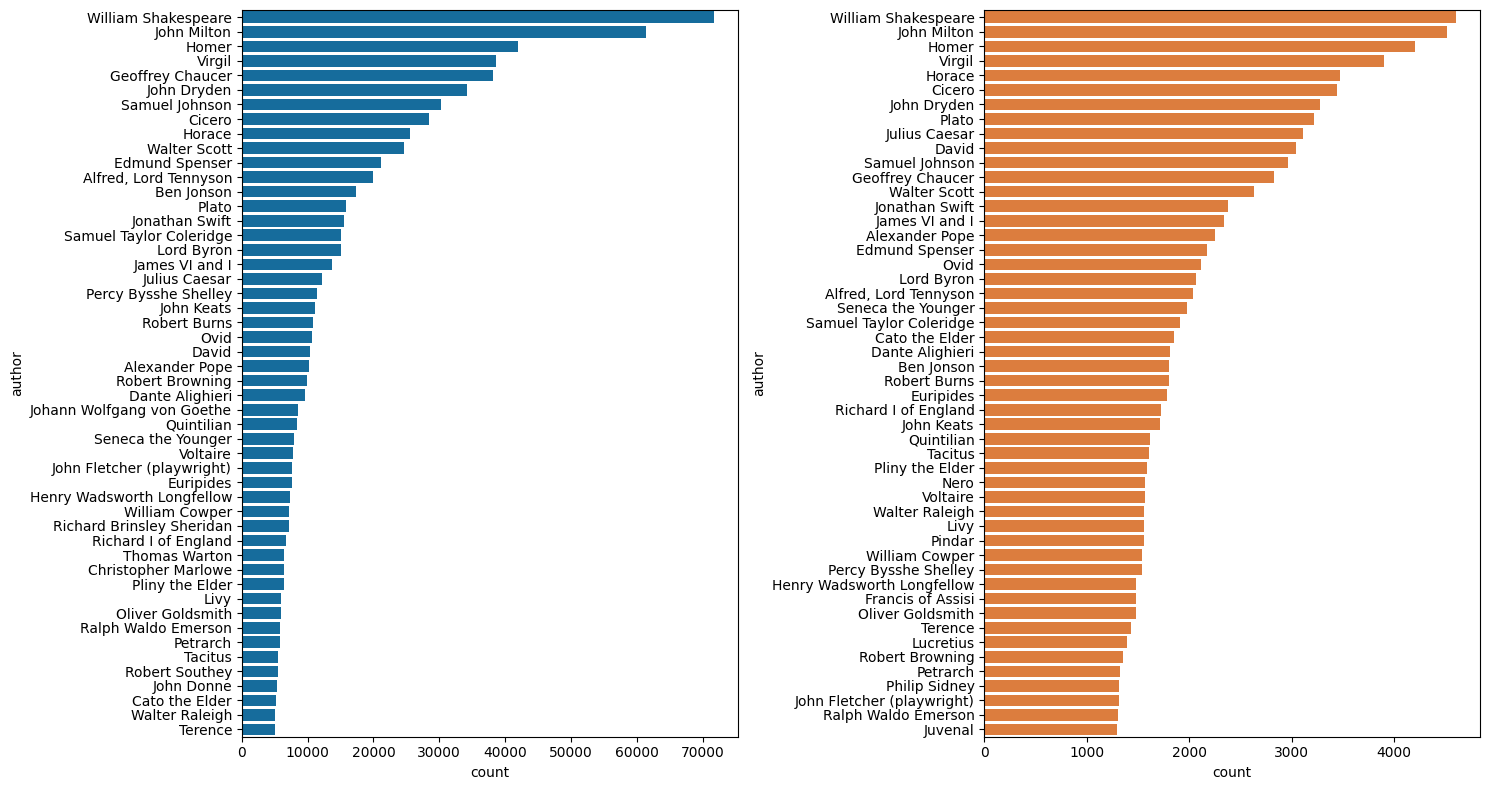

In [10]:
n = 50
fig, axes = plt.subplots(1, 2, figsize=(15, 8)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    top = df['author'].value_counts().nlargest(n).index
    filtered_mentions = df[df['author'].isin(top)]
    sns.countplot(data=df, y="author", order=top, ax=axes[i], color=COLORS[i])
plt.tight_layout()
plt.show()

### Countries of origin

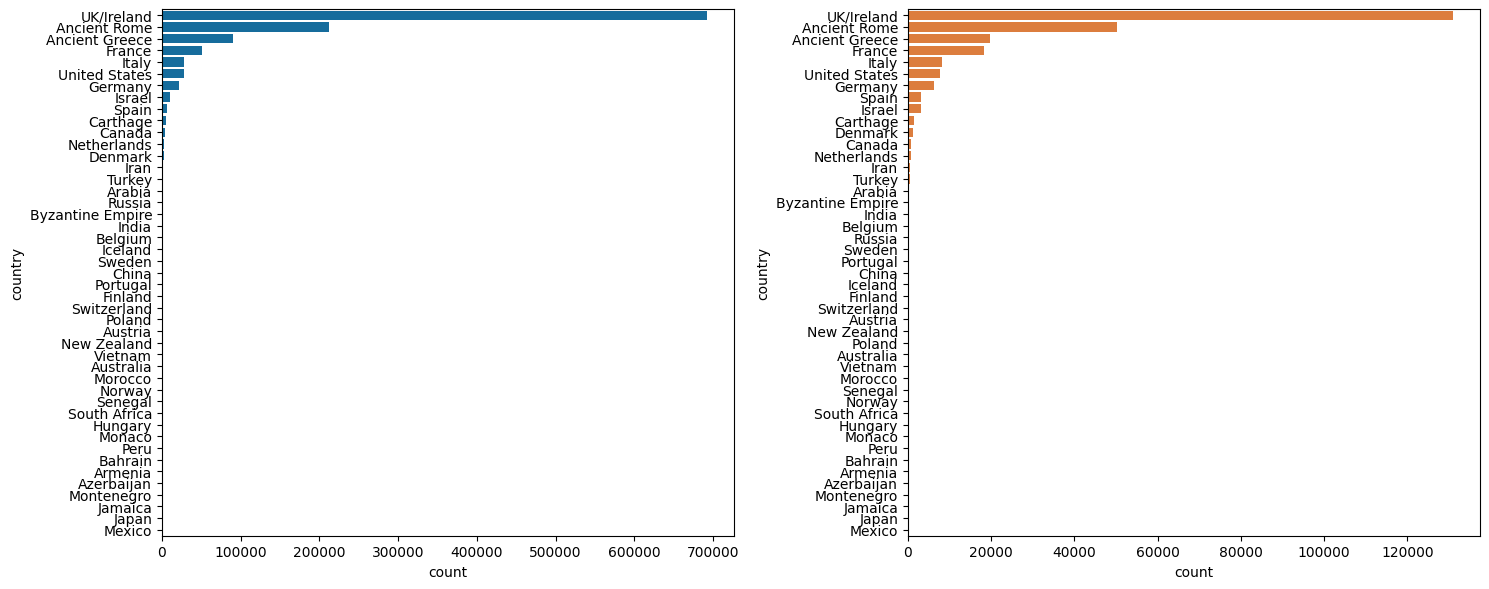

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    order = df['country'].value_counts().sort_values(ascending=False).index
    sns.countplot(data=df, y="country", order=order, ax=axes[i], color=COLORS[i])
plt.tight_layout()
plt.show()

### Centuries when authors born

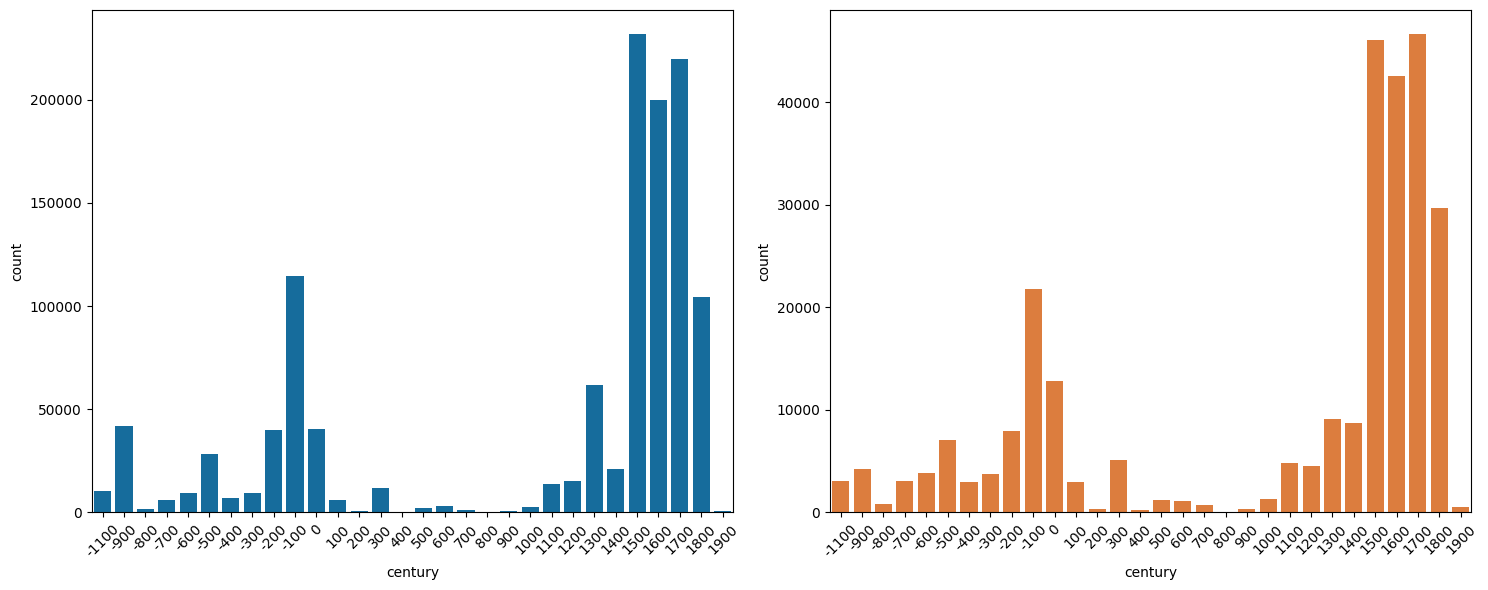

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    sns.countplot(data=df, x='century', ax=axes[i], color=COLORS[i])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Gender

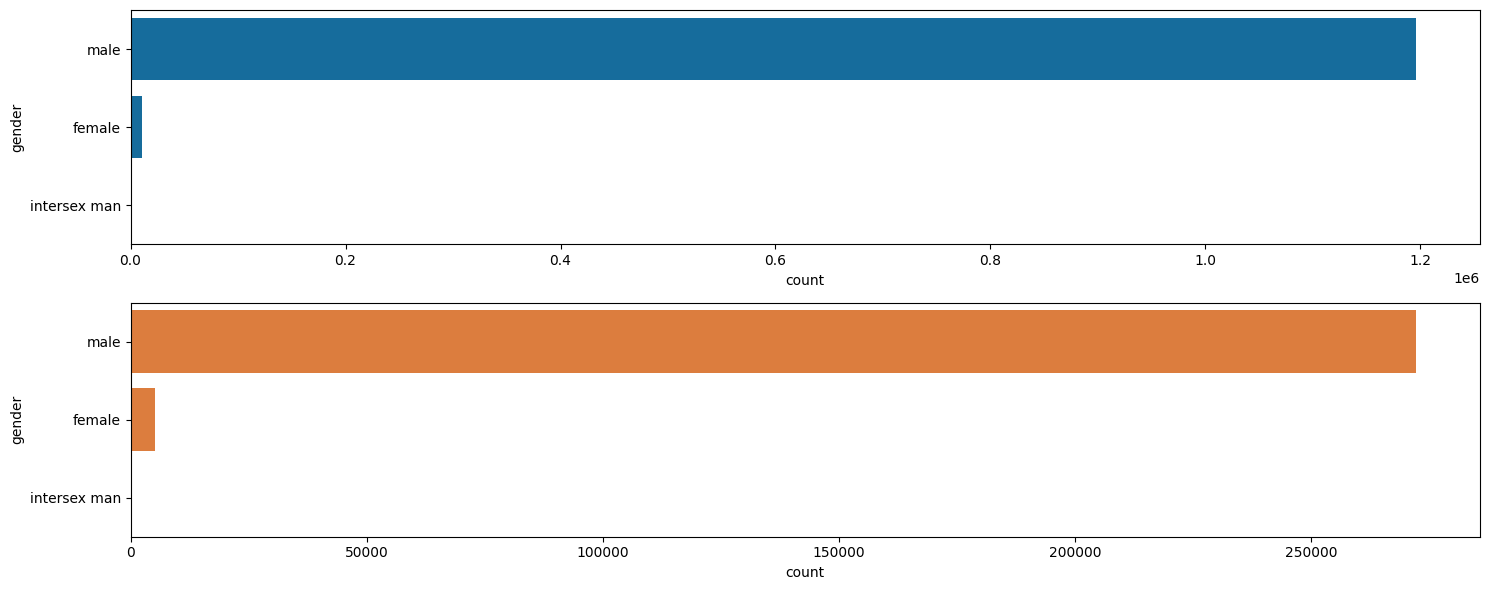

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 6)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    sns.countplot(data=df, y='gender', ax=axes[i], color=COLORS[i])
plt.tight_layout()
plt.show()

# Stats over time

### Centuries when authors born

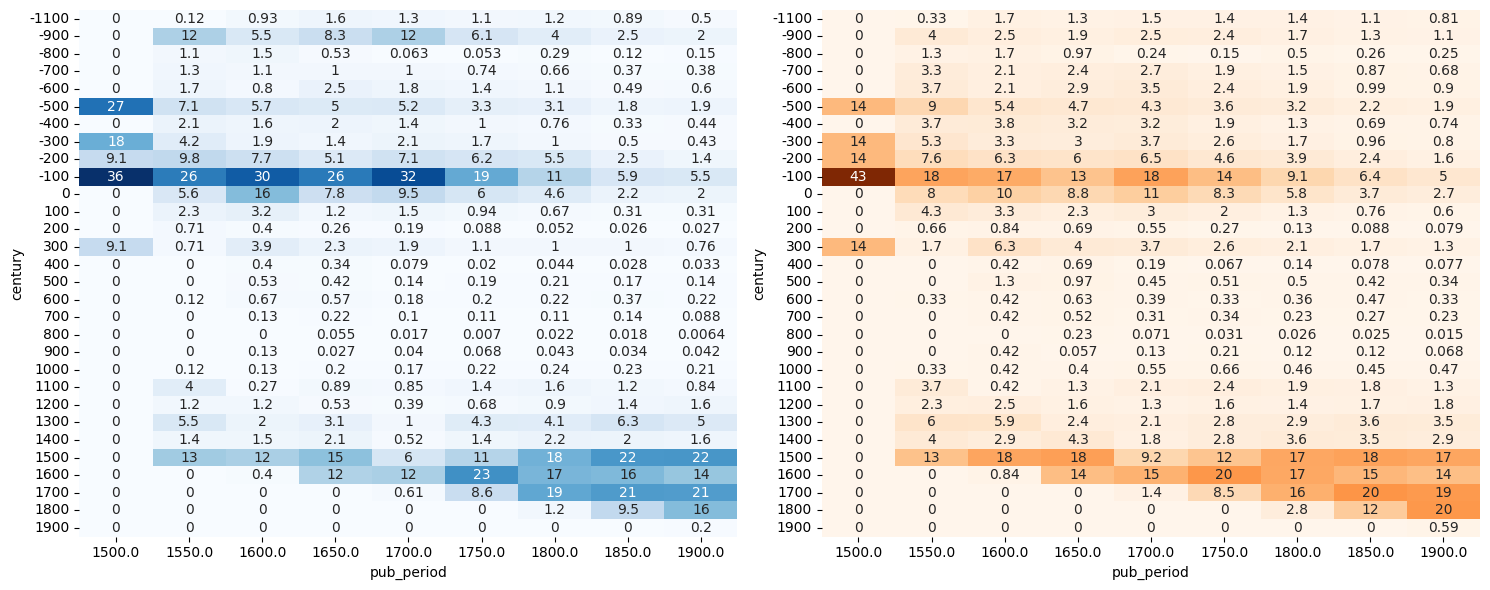

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    count_data = df.groupby(['century', 'pub_period']).size().unstack(fill_value=0)
    heatmap_data = count_data.div(count_data.sum(axis=0), axis=1) * 100
    sns.heatmap(heatmap_data, annot=True, cmap=PALETTES[i], cbar=False, ax=axes[i], color=COLORS[i])
plt.tight_layout()
plt.show()

### Countries of origin

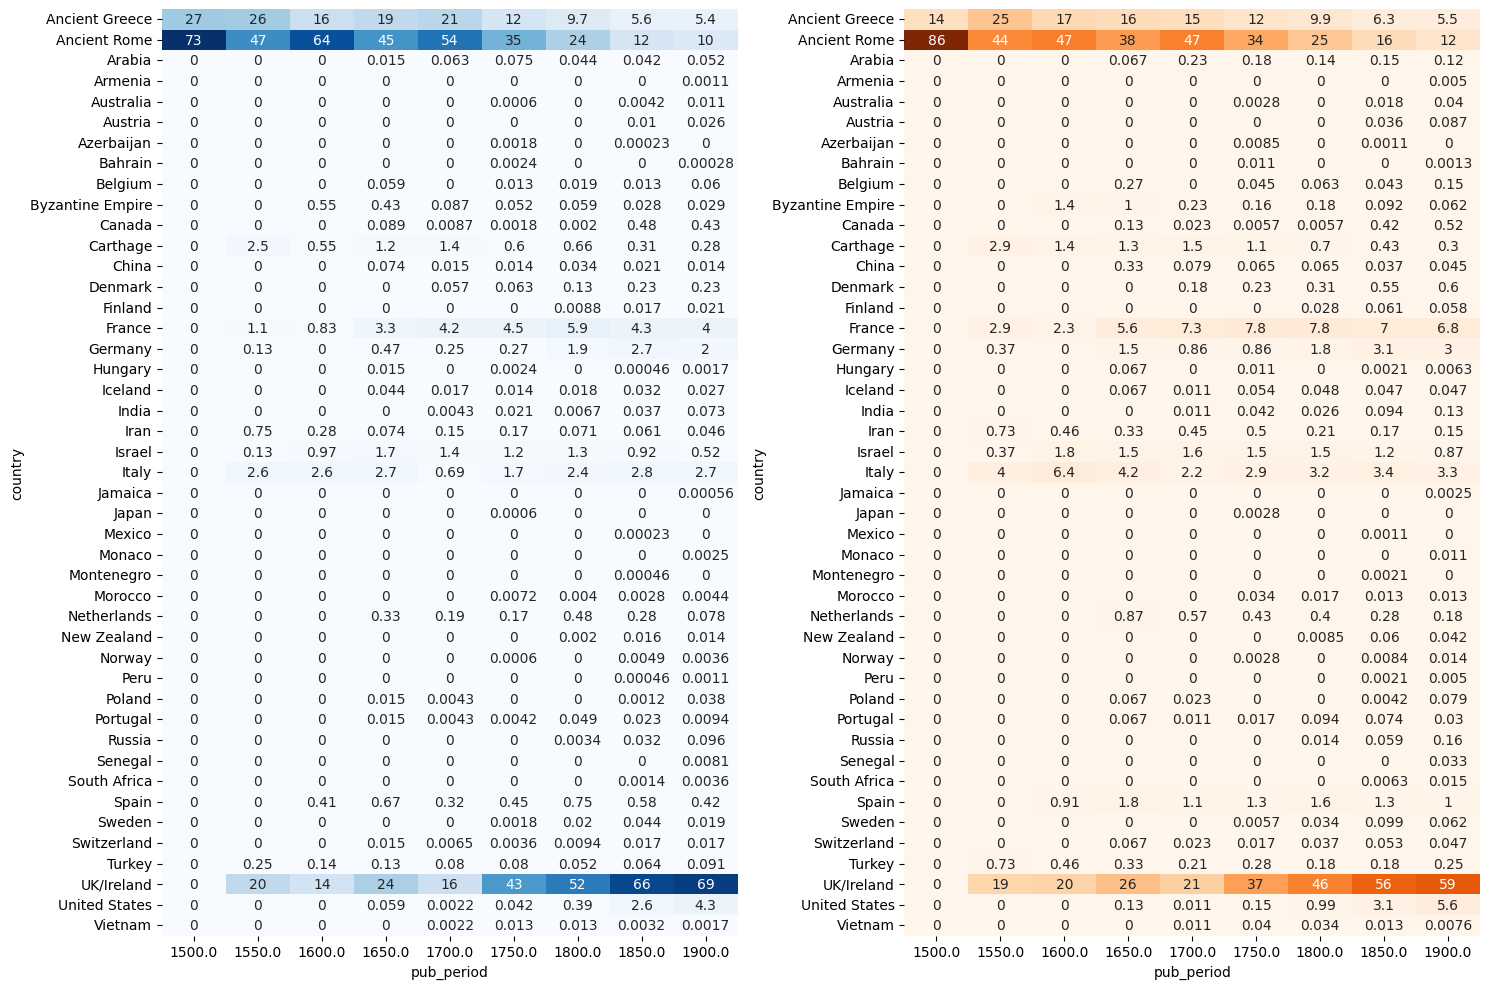

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10)) 
for i,df in enumerate([mentions, mentions_deduplicated]): 
    count_data = df.groupby(['country', 'pub_period']).size().unstack(fill_value=0)
    heatmap_data = count_data.div(count_data.sum(axis=0), axis=1) * 100
    sns.heatmap(heatmap_data, annot=True, cmap=PALETTES[i], cbar=False, ax=axes[i], color=COLORS[i])
plt.tight_layout()
plt.show()